# **Distributed Flexible Job shop Scheduling Problem**

Nous allons traiter dans ce notebook DFJS avec les algorithmes génétiques comme une métaheuristique.

Il est noté que dans ce travail particulièrement et dans le DFJSP, nous considérons les hypothèses et contraintes suivantes : 

(1) On suppose généralement que chaque machine ne peut traiter qu'une seule opération à la fois;

(2) Chaque opération ne peut être traitée qu'après son opération de précédence; 

(3) Chaque opération doit être exécutée sur une seule machine; 

(4) Une fois qu'un travail est attribué à un factory, toutes ses opérations seront traitées dans cet factory ; 

(5) Les opérations doivent être poursuivies jusqu'à leur achèvement.


**Géneration des chromosomes:**


Dans cette partie nous allons présenter chaque chromosome sous cette forme :

[Num_Factory, Nombre_unités_M1, Nombre_unités_M2, Num_Premiere_Machine]

In [ ]:
import random as rd
def generate_chromosome (n) : 
# i représente un job 
  chromosome = dict()
  factories = [1,2]
  #Nous avons introduit la liste l pour limiter le nombre d'unités pour chaque machine à 3 (un nombre entre 0 et 3)
  l = [i for i in range(4)] 
  for i in range(n) : 
    chromosome[i] = [rd.choice(factories), rd.choice(l), rd.choice(l), rd.choice([1,2])]
    #Ici on va traiter un cas particulier (Commencer par une machine qui contient 0 unité de temps)
    if 0 in chromosome[i] : 
      if chromosome[i].index(0) == 1 :
        chromosome[i][3] = 2 
      else : 
        chromosome[i][3] = 1

  return chromosome

**Géneration d'une population**

In [ ]:
def generate_population(size) : 
  return [generate_chromosome(n) for i in range(size)]

**Réalisation de l'ordonnancement par un ordre de Johnson**

In [ ]:
def last_1(n):
    return n[-1]
def last_2(n):
    return n[-1][-1]

In [ ]:
#L'input de cette fonction sera une liste d'un seul factory Exemple : [[m1,m2,1] [[m1,m2,1], [m1,m2,1], [m1,m2,2]]

def Johnson (l) :
  #Initialisation du l'output
  dd = {'m1' : [], 'm2' : []} 
  #Initialisation de d qui va contenir les 4 séquences (M1 seulement, M2 seulement, M1 puis M2, M2 puis M1)
  d = {1 : [], 2 : [], 3 : [], 4 : []}
  for i in range(len(l)) :
    if 0 in l[i] : 
      pos = l[i].index(0)
      if pos == 1 :
        d[l[i][2]].append((i,[l[i][0],0])) #(job,[durée1,durée2])
      else : 
        d[l[i][2]].append((i,[0,l[i][1]])) 
    else : 
      if l[i][2] == 1 : 
        d[3].append((i,[l[i][0],l[i][1]])) #(i,[d1,d2])
      else : 
        d[4].append((i,[l[i][0],l[i][1]]))
    #Trier chaque séquence
    d[1] = sorted(d[1], key=last_1)
    d[3] = sorted(d[3], key=last_1)
    d[2] = sorted(d[2], key=last_2)
    d[4] = sorted(d[4], key=last_2)
  #Sauvegarder la séquence d'exécution ordonnée de chaque machine dans un dictionnaire
  dd['m1'] = d[3] + d[1] + d[4]
  dd['m2'] = d[4] + d[2] + d[3]

  return dd

In [ ]:
tt = Johnson([[0, 3, 2],[1, 2, 1],[ 3, 3, 1],[2,2,2]])

In [ ]:
tt

{'m1': [(1, [1, 2]), (2, [3, 3]), (3, [2, 2])],
 'm2': [(3, [2, 2]), (0, [0, 3]), (1, [1, 2]), (2, [3, 3])]}

In [ ]:
#Cette fontion va retourner le Cmax dans chaque factory

def makespan (machines) : 
  m = ['m1','m2']
  times = []
  for i in m :
    time = 0
    if i == 'm1' : 
      ll = machines[i]
      for j in range(len(machines[i])) :
        time += ll[j][1][0]
    else : 
      ll = machines[i]
      for j in range(len(machines[i])) :
        time += ll[j][1][1]
    times.append(time)
  return max(times)



In [ ]:
makespan(tt)

10

In [ ]:
#Input de cette fontion est une chromosome {0: [2, 0, 3, 2],1: [2, 1, 2, 1], 2: [2, 0, 3, 2], 3: [1, 3, 3, 1], 4: [2, 2, 2, 2]} 
#Cette fonction va retourner Cmax des tous les factories
def fitness(chromosome) : 
  factories = {1:[],2:[]}
  for i in range(len(chromosome)) : 
    l = chromosome[i]
    factories[l[0]].append(l[1:]) 
  
  F1 = Johnson(factories[1])
  F2 = Johnson(factories[2])
  time = [makespan(F1), makespan(F2)]
  return max(time)

In [ ]:
fitness({0: [2, 0, 3, 2],1: [2, 1, 2, 1], 2: [2, 0, 0, 2], 3: [1, 3, 3, 1], 4: [2, 2, 2, 2]})

7

In [ ]:
#[{0: [2, 0, 0, 2],1: [2, 2, 1, 1],2: [2, 3, 0, 1],3: [2, 0, 3, 2],4: [1, 2, 0, 1]},{0: [2, 2, 2, 1], 1: [1, 1, 2, 1], 2: [2, 1, 1, 2], 3: [1, 1, 1, 2], 4: [1, 0, 1, 2]}]
#l'output de cette fonction est une population générée aléatoirement
def mutation(population) : 
  for i in range(len(population)) :
    ch = population[i] #chromosome
    
    for j in range(n//2) : 
      r = rd.choice([k for k in range(len(ch))]) #job
      #changement des factories
      if ch[r][0] == 1 : 
        ch[r][0] = 2 
      else : 
        ch[r][0] = 1
      #changement des jobs 
      r = rd.choice([k for k in range(len(ch))]) #job
      if 0 not in ch[r] : 
        if ch[r][3] == 1 :
          ch[r][3] = 2 
        else : 
          ch[r][3] = 1

      population[i] = ch
  return population 


In [ ]:
# main 
n = int(input('nombre des jobs :'))
size = int(input('size of the population :'))
num_gen = int(input('generation number :'))
chromosome = generate_chromosome(n)
best_solution = [chromosome, fitness(chromosome)]
print("best sol : ", best_solution)
population = generate_population(size)
solutions_gen = dict()
for i in range(num_gen) : 
  fitness_sol = []
  for j in range(len(population)) : 
    f = fitness(population[j])
    fitness_sol.append(f)
    if f < best_solution[1] : 
      best_solution = [population[j], f]
  solutions_gen[i] = best_solution
  print("les valeurs de fitness pour la génération ",i," est : ",fitness_sol)
  print("best solution is : ", best_solution)
  population = mutation(population)


nombre des jobs :50
size of the population :10
generation number :10
best sol :  [{0: [2, 1, 2, 1], 1: [1, 2, 3, 2], 2: [2, 2, 3, 1], 3: [1, 3, 1, 2], 4: [1, 2, 0, 1], 5: [2, 2, 2, 2], 6: [2, 3, 1, 1], 7: [1, 0, 2, 2], 8: [1, 1, 0, 1], 9: [1, 0, 3, 2], 10: [2, 3, 3, 1], 11: [1, 1, 0, 1], 12: [1, 0, 1, 2], 13: [1, 1, 1, 2], 14: [1, 2, 0, 1], 15: [2, 1, 3, 2], 16: [1, 1, 3, 1], 17: [1, 0, 3, 2], 18: [2, 2, 0, 1], 19: [2, 2, 0, 1], 20: [2, 3, 3, 2], 21: [1, 0, 0, 2], 22: [2, 2, 0, 1], 23: [2, 3, 1, 2], 24: [2, 2, 0, 1], 25: [2, 1, 1, 2], 26: [1, 3, 3, 2], 27: [1, 1, 3, 1], 28: [2, 0, 1, 2], 29: [2, 0, 1, 2], 30: [2, 2, 3, 2], 31: [1, 3, 1, 1], 32: [1, 0, 1, 2], 33: [1, 3, 2, 2], 34: [1, 0, 2, 2], 35: [1, 2, 0, 1], 36: [1, 3, 1, 2], 37: [2, 3, 3, 2], 38: [1, 2, 0, 1], 39: [2, 1, 3, 2], 40: [1, 2, 1, 2], 41: [2, 1, 2, 2], 42: [1, 1, 3, 1], 43: [2, 2, 1, 2], 44: [1, 3, 1, 1], 45: [2, 0, 2, 2], 46: [2, 3, 0, 1], 47: [2, 1, 3, 2], 48: [1, 3, 1, 2], 49: [2, 3, 3, 1]}, 43]
les valeurs de fitness

**Un autre exemple généré où on a trouver Cmax = 3**

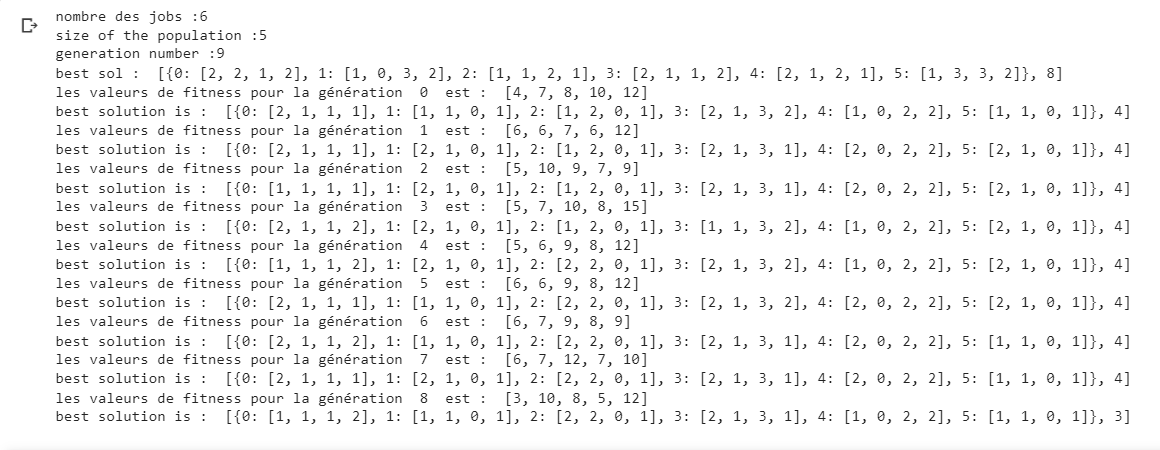